In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '/Users/Onur/repos/toolbox/')
from plot_helpers import *
%matplotlib inline

In [113]:
import pickle
with open('./cleaned_data.pkl', 'r') as f:
    data = pickle.load(f)

In [3]:
print data.keys()
df = data['train_data']
df.head()

['Sex_code', 'Title_code', 'test_data', 'Embarked_code', 'train_data']


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_code,Embarked_code
0,1,0,3,0,22.0,1,0,7.2500,0.0,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0,1.0
2,3,1,3,1,26.0,0,0,7.9250,2.0,0.0
3,4,1,1,1,35.0,1,0,53.1000,1.0,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0,0.0


## The "X" values

In [4]:
variables = df[df.columns[2:]]
df[df.columns[2:]].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_code,Embarked_code
0,3,0,22.0,1,0,7.2500,0.0,0.0
1,1,1,38.0,1,0,71.2833,1.0,1.0
2,3,1,26.0,0,0,7.9250,2.0,0.0
3,1,1,35.0,1,0,53.1000,1.0,0.0
4,3,0,35.0,0,0,8.0500,0.0,0.0


## The "y" values (labels)

In [5]:
labels = df['Survived']
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
print variables.shape
print labels.shape

(712, 8)
(712,)


# scikitlearn first 3 suggested algorithms for classification
### Algorithm1: Support Vector Machines

In [7]:
from sklearn import svm

max score here: [ 96.           0.97331461]


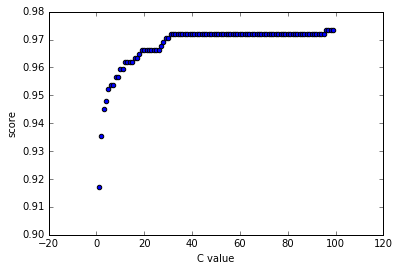

In [51]:
scores = []
for C in np.arange(0, 100, 1)[1:]:
    alg = svm.SVC(kernel='rbf', C=C)
    try:
        model = alg.fit(variables, labels)        
    except ValueError:
        print 'infeasible nu reached at', nu
        break
    score = model.score(variables, labels)
    scores.append([C, score])
    plt.scatter(C, score)
scores = np.asarray(scores)
print 'max score here:', scores[np.argmax(scores[:,1])]
plt.ylabel('score')
plt.xlabel('C value')
plt.show()

infeasible nu reached at 0.81
max score here: [ 0.06       0.9747191]


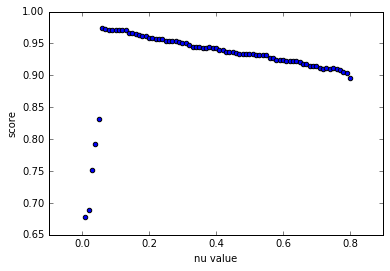

In [45]:
scores = []
for nu in np.arange(0, 1, 0.01)[1:-1]:
    nusvc = svm.NuSVC(kernel='rbf', nu=nu)
    try:
        model = nusvc.fit(variables, labels)        
    except ValueError:
        print 'infeasible nu reached at', nu
        break
    score = model.score(variables, labels)
    scores.append([nu, score])
    plt.scatter(nu, score)
scores = np.asarray(scores)
print 'max score here:', scores[np.argmax(scores[:,1])]
plt.ylabel('score')
plt.xlabel('nu value')
plt.show()

In [39]:
linsvc = svm.LinearSVC()
model = linsvc.fit(variables, labels)
model.score(variables, labels)

0.7921348314606742

In [40]:
linsvr = svm.LinearSVR()
model = linsvr.fit(variables, labels)
model.score(variables, labels)

0.27178587447192282

In [41]:
nusvr = svm.NuSVR()
model = nusvr.fit(variables, labels)
model.score(variables, labels)

0.77056641931383263

### Algorithm2: Nearest Neighbors
I don't really get this one... what's the best way to assign number of neighbors?

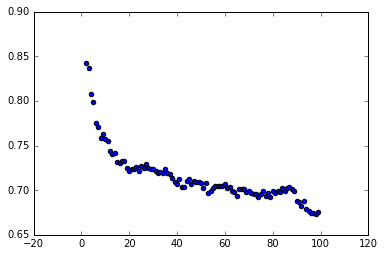

In [26]:
from sklearn import neighbors
for n in range(2,100):
    kn = neighbors.KNeighborsClassifier(n_neighbors=n)
    model = kn.fit(variables, labels)
    score = model.score(variables, labels)
    plt.scatter(n, score)

### Algorithm 3: Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
alg = RandomForestClassifier()
model = alg.fit(variables, labels)
model.score(variables, labels)

0.973314606741573

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

In [129]:
alg = ExtraTreesClassifier()
model = alg.fit(variables, labels)
model.score(variables, labels)

0.9887640449438202

# Predict using the best model
## First fill in the Fare NaNs

In [117]:
fare_X = df[df.columns[~df.columns.str.contains('PassengerId|Survived|Age')]]
fare_y = df['Age'].astype(str)

In [130]:
from sklearn.linear_model import LogisticRegression
alg = LogisticRegression()
age_model = alg.fit(fare_X, fare_y)
print age_model.score(fare_X, fare_y)
alg = ExtraTreesClassifier()
age_model = alg.fit(fare_X, fare_y)
print age_model.score(fare_X, fare_y)

0.0814606741573
0.636235955056


In [114]:
test = data['test_data'].drop('PassengerId', axis=1)

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass           418 non-null int64
Sex              418 non-null int64
Age              332 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null float64
Title_code       418 non-null float64
Embarked_code    418 non-null float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [127]:
fillin = test[pd.isnull(test['Age'])].drop('Age', axis=1)
# check the variable orders are the same
print fare_X.columns
print fillin.columns
ages = model.predict(fillin).astype(float)
test.loc[fillin.index, 'Age'] = ages

Index([u'Pclass', u'Sex', u'SibSp', u'Parch', u'Fare', u'Title_code',
       u'Embarked_code'],
      dtype='object')
Index([u'Pclass', u'Sex', u'SibSp', u'Parch', u'Fare', u'Title_code',
       u'Embarked_code'],
      dtype='object')


In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass           418 non-null int64
Sex              418 non-null int64
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null float64
Title_code       418 non-null float64
Embarked_code    418 non-null float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [136]:
prediction = model.predict(test)

In [140]:
submission = data['test_data'][['PassengerId']]
submission.loc[submission.index, 'Survived'] = prediction
submission

/Users/Onur/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Onur/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [141]:
submission.to_csv('./submission_1.csv', index=False)